## Demo Bunka

Bunka is a class that inherits from different subclasses that carry out diverse machine learning and Natural Language Processing operatioons

In [2]:
import sys
sys.path.append("/Users/charlesdedampierre/Desktop/BUNKA Project/bunkatech")

In [3]:
import pandas as pd
from bunkatech import Bunka
import warnings
warnings.filterwarnings('ignore')
 
    
data = pd.read_csv('../data/imdb.csv', index_col = [0])
data = data.sample(2000, random_state = 42)

/Users/charlesdedampierre/Desktop/BUNKA Project/bunkatech/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


###  Instantiate the BasicSemantics class

In [5]:
bunka = Bunka(data = data,
                text_var = 'description',
                index_var = 'imdb',
                extract_terms=True,
                terms_embedding=True,
                docs_embedding=True,
                sample_size_terms=2000,
                terms_limit=2000,
                terms_ents=False,
                terms_ngrams=(2, 2),
                terms_ncs=False,
                terms_include_pos=["NOUN", "PROPN", "ADJ"],
                terms_include_types=["PERSON", "ORG"],
                terms_embedding_model="all-MiniLM-L6-v2",
                docs_embedding_model="all-MiniLM-L6-v2",
                language="en",
                terms_path=None,
                docs_dimension_reduction = 5,
                terms_embeddings_path=None,
                docs_embeddings_path=None,
                docs_multiprocessing = True,
                terms_multiprocessing = True)

  0%|                                                                                   | 0/1991 [00:00<?, ?it/s]2022-11-18 17:14:23,266 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-11-18 17:14:23,267 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-11-18 17:14:23,267 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-11-18 17:14:23,268 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-11-18 17:14:23,268 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-11-18 17:14:23,272 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-11-18 17:14:23,273 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-11-18 17:14:23,276 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
100%|███████████████████████████████████████████████████████████████████████| 1991/1991 [00:07<00:00, 265.63it/s]
2022-11-18 17:14:25,687 - INFO : Load pretrained SentenceTransformer: all-MiniLM-L6-v2
2022-11-18 17:14:25,969 - INFO : Use p

Start Embedding...


2022-11-18 17:14:27,861 - INFO : Use pytorch device: cpu
2022-11-18 17:14:27,861 - INFO : CUDA is not available. Start 4 CPU worker
2022-11-18 17:14:27,862 - INFO : Start multi-process pool on devices: cpu, cpu, cpu, cpu


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Fri Nov 18 17:14:37 2022 Finding Nearest Neighbors
Fri Nov 18 17:14:38 2022 Finished Nearest Neighbor Search
Fri Nov 18 17:14:39 2022 Construct embedding


Epochs completed: 100%| █████████████████████████████████████████████████████████████████████████ 500/500 [00:01]

Fri Nov 18 17:14:41 2022 Finished embedding


#### Fit the class

For multilangue embedding, **distiluse-base-multilingual-cased-v1** is the best to use. For only english, you may use **all-MiniLM-L6-v2**

#### Display the results

In [6]:
terms = bunka.terms # Display extracted terms
terms_embeddings = bunka.terms_embeddings # Display terms embeddings
docs_embeddings = bunka.docs_embeddings # Display docs embeddings

In [7]:
terms.head(5)

,lemma,count_terms,text,main form,ent
0,new york,57,New York,new york,NaN
1,young man,45,young man | young men,young man,NaN
2,young woman,40,younger woman | young woman | young women,young woman,NaN
3,york city,33,York City,york city,NaN
4,good friend,29,best friend | best friends,best friend,NaN


In [8]:
terms_embeddings.head(5)

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
new york,0.086363,-0.019883,0.071494,0.048815,-0.033144,-0.001401,0.008352,-0.057807,-0.017513,-0.039793,...,0.017531,0.031692,-0.016117,0.021929,-0.076663,0.041794,0.103244,-0.045446,-0.027529,0.035334
young man,-0.054424,0.102381,-0.016731,-0.009139,0.017711,-0.023019,0.142750,-0.012219,0.006698,0.027264,...,0.145699,-0.039291,-0.015133,0.067595,0.000700,-0.006800,0.139238,-0.026916,0.015822,0.022758
young woman,-0.035009,0.024305,-0.004279,0.007209,-0.012090,0.017953,0.071988,0.025450,0.023999,0.037704,...,0.005457,0.021963,0.012094,0.018253,0.003366,0.097345,0.064532,-0.000051,0.076264,0.005071
york city,0.075048,0.030160,0.041267,0.049191,-0.044017,0.016805,0.041382,-0.028511,-0.046098,-0.010233,...,0.009820,-0.019376,-0.018168,0.007974,-0.086875,0.037915,0.106390,-0.024629,-0.020410,0.048810
best friend,-0.128368,0.077111,0.033445,-0.043632,0.011336,-0.026740,0.085022,0.139916,-0.011521,0.022746,...,0.035195,-0.043817,-0.054759,0.016440,0.040268,-0.010632,0.113419,0.062290,-0.060212,0.090107


In [9]:
docs_embeddings.head(5)

,0,1,2,3,4
imdb,,,,,
tt0205177,8.419321,13.831893,15.478493,5.841931,1.951918
tt2316801,8.756722,12.631425,16.076677,6.458174,2.629080
tt0465234,7.959995,11.802996,15.947361,4.016066,1.322388
tt1846589,7.487865,11.185894,16.351059,4.431986,2.305148
tt0824758,8.417170,11.802746,15.103798,6.519677,2.550747


#### Origami projection

2022-11-18 17:15:02,437 - INFO : Load pretrained SentenceTransformer: all-MiniLM-L6-v2
2022-11-18 17:15:02,645 - INFO : Use pytorch device: cpu
Batches: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 84.40it/s]


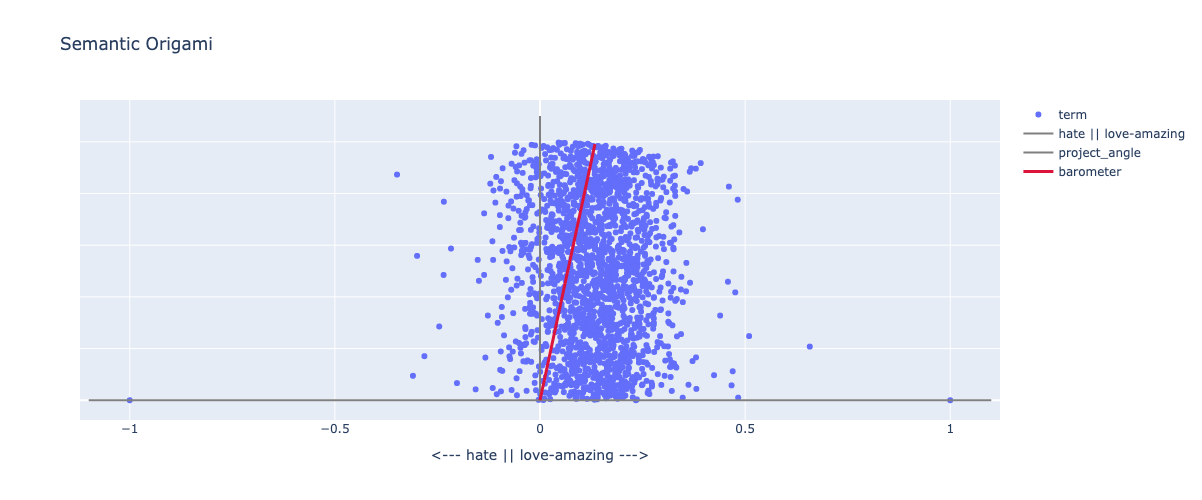

In [11]:
fig = bunka.origami_projection_unique(
                    left_axis= ['love', 'amazing'],
                    right_axis = ['hate'],
                    height=500,
                    width=1000,
                    type="terms",
                    dispersion=True,
                    barometer=True,
                    explainer = True
    
                )
fig.show()

#### Draw networks

Computing transition probabilities: 100%|███████████████████████████████████| 152/152 [00:00<00:00, 21306.54it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Generating walks (CPU: 10): 100%|██████████| 1/1 [00:00<00:00, 48.36it/s]2022-11-18 17:15:11,325 - INFO : collecting all words and their counts
2022-11-18 17:15:11,326 - INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-11-18 17:15:11,336 - INFO : collected 152 word types from a corpus of 121600 raw words and 1520 sentences
2022-11-18 17:15:11,336 - INFO : Creating a fresh vocabulary
2022-11-18 17:15:11,337 - INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 152 unique words (100.00% of original 152, drops 0)', 'datetime': '2022-11-18T17:15:11.337561', 'gensim': '4.2.0', 'python': '3.8.14 (default, Sep  6 2022, 23:17:06) \n[Clang 13.1.6 (clang-1316.0.21.2.5)]', 'platform': 'macOS-12.2-arm64-arm-64bit', 'event': 'prepare_vocab'}
2022-11-18 17:15:11,337 - INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 121600 word corpus (100.00% of original 121600, drops 0)', 'datetime': '2022-11-18T17:15:11.337887', 'gensim': '4.2.0

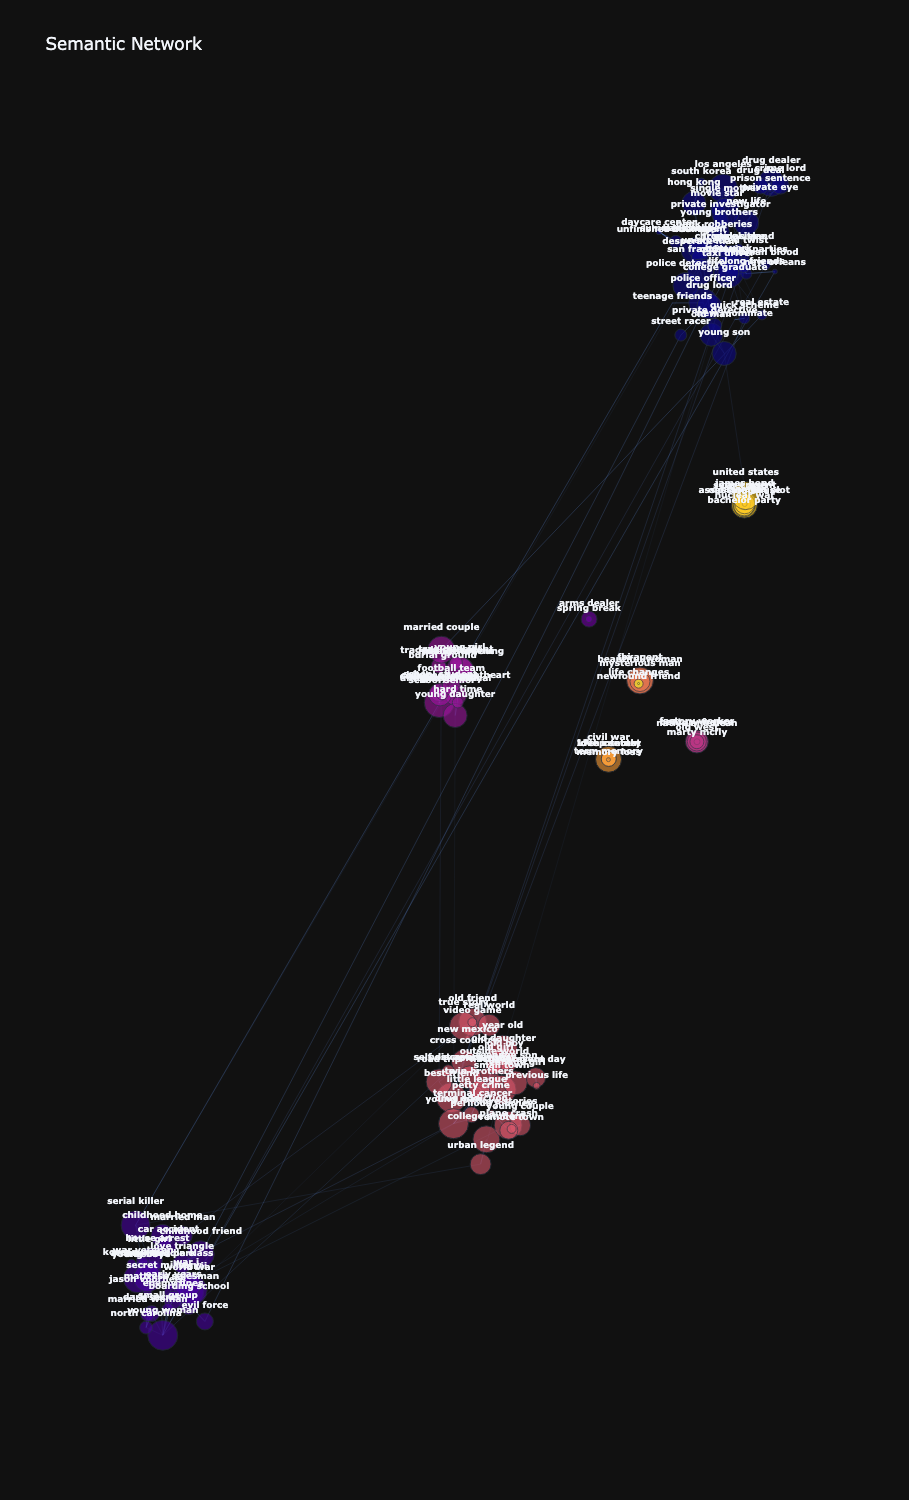

In [12]:
fig = bunka.fit_draw(
            variables=["main form"],
            top_n=200,
            global_filter=0.2,
            n_neighbours=6,
            method="node2vec",
            n_cluster=10,
            bin_number=30,
            black_hole_force=1,
            color="community",
            size="size",
            symbol="entity",
            textfont_size=9,
            edge_size=1,
            height=1500,
            width=1500,
            template="plotly_dark",
        )

fig.show()

In [13]:
# If you wish to export the .html fig
import plotly
plotly.offline.plot(fig, filename = 'fig.html', auto_open=True)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


'fig.html'

### Display Nexted Topics

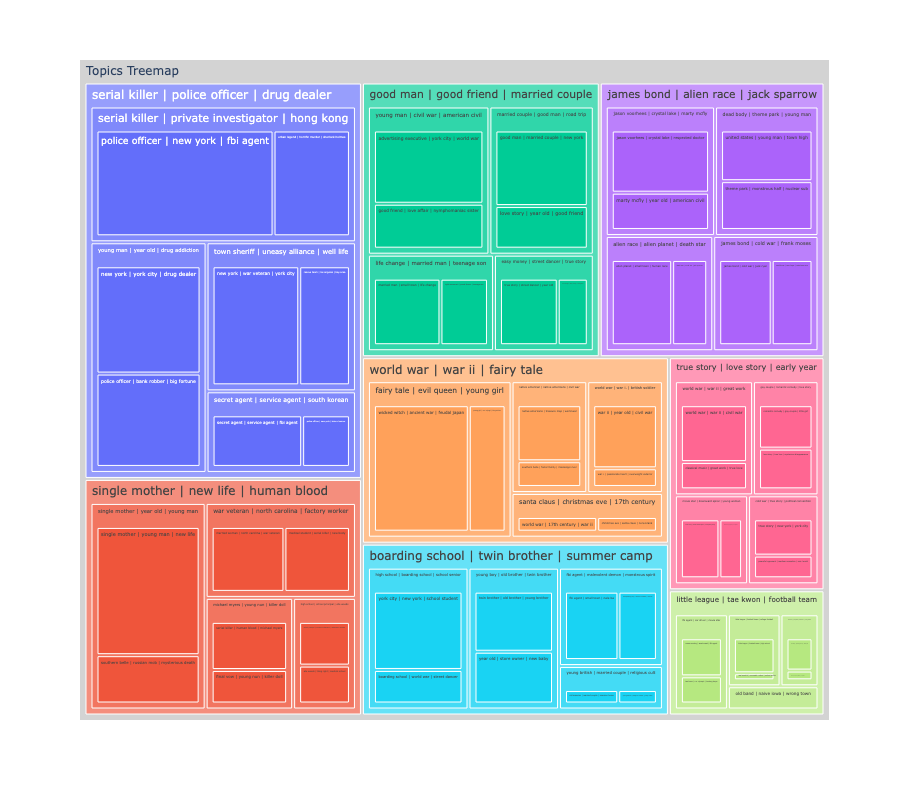

In [14]:
fig_nested = bunka.nested_maps(
        size_rule="docs_size",
        map_type="treemap", # Try sunburst
        width=800,
        height=800,
        query=None) # You can query the map with an exact query

fig_nested.show()